# Training (OffendEs)

In [1]:
# !conda install -c conda-forge nbstripout



In [2]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import NullFormatter
import pandas as pd
import scipy.optimize as opt
from sklearn import preprocessing
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

In [3]:
# !pip install gensim


In [4]:
# !pip install "gensim==3.8.1"


In [5]:
# !pip uninstall gensim
# !pip install gensim
# !pip install --upgrade gensim

In [6]:
import pandas as pd
import numpy as np
import re
import nltk
from nltk.stem import WordNetLemmatizer
from nltk import word_tokenize
from nltk.corpus import stopwords
import string
import matplotlib.pyplot as plt
import gensim
import numpy as np
from gensim.models import CoherenceModel, LdaModel, LsiModel, HdpModel
# from gensim.models.wrappers import LdaMallet
from gensim.corpora import Dictionary


In [7]:
from gensim.models.wrappers import LdaMallet


In [8]:
train1= pd.read_csv('traindata1.tsv', engine='python', error_bad_lines=False, delimiter='\t')
train2= pd.read_csv('traindata2.tsv', engine='python', error_bad_lines=False, delimiter='\t')




In [9]:
train1.head()

,comment_id,comment,label
0,52564,"En vez de la magia de mi melena, la magia de m...",NO
1,32984,"A ver, los milenials y la gente normal necesit...",NO
2,58447,Me encanta todo el contenido que haces se nota...,NO
3,10341,a Laura sige así que vales mucho más que 10 o ...,NO
4,53087,"Y si no mes gusta Dalas, que hacen aquí,lárgue...",NO


In [10]:
train1.groupby('label').count()

,comment_id,comment
label,,
NO,13212,13212
NOM,1235,1235
OFG,212,212
OFP,2051,2051


In [11]:
train1.groupby('label').describe()

comment_id                                                       \
           count          mean           std   min       25%      50%   
label                                                                   
NO       13212.0  30854.272404  17655.094537   0.0  15607.75  31242.0   
NOM       1235.0  29871.959514  16967.872876  40.0  15272.00  29902.0   
OFG        212.0  27191.372642  17671.654202  45.0  11501.00  25032.5   
OFP       2051.0  29422.713311  17052.697265  35.0  14702.50  28638.0   

                         
           75%      max  
label                    
NO     46521.5  59998.0  
NOM    43936.0  59990.0  
OFG    42968.5  59745.0  
OFP    44193.0  59982.0

In [12]:
train1['length']=train1['comment'].apply(len)

In [13]:
train1.head()

,comment_id,comment,label,length
0,52564,"En vez de la magia de mi melena, la magia de m...",NO,56
1,32984,"A ver, los milenials y la gente normal necesit...",NO,135
2,58447,Me encanta todo el contenido que haces se nota...,NO,165
3,10341,a Laura sige así que vales mucho más que 10 o ...,NO,81
4,53087,"Y si no mes gusta Dalas, que hacen aquí,lárgue...",NO,560


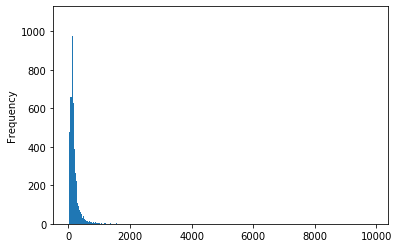

In [14]:
train1['length'].plot.hist(bins=1000)

In [15]:
# np.__version__

In [16]:
# pd.__version__

In [17]:
train1['length'].describe()

count    16710.000000
mean       172.339078
std        209.464901
min          3.000000
25%         84.000000
50%        134.000000
75%        199.000000
max       9887.000000
Name: length, dtype: float64

In [18]:
train1[train1['length']==9887]['comment'].iloc[0]

'Nosotros no tenemos nada que esconder :v Nosotros no tenemos nada que esconder  Nosotros no tenemos nada que esconder  Nosotros no tenemos nada que esconder  Nosotros no tenemos nada que esconder  Nosotros no tenemos nada que esconder  Nosotros no tenemos nada que esconder  Nosotros no tenemos nada que esconder  Nosotros no tenemos nada que esconder  Nosotros no tenemos nada que esconder  Nosotros no tenemos nada que esconder  Nosotros no tenemos nada que esconder  Nosotros no tenemos nada que esconder  Nosotros no tenemos nada que esconder  Nosotros no tenemos nada que esconder  Nosotros no tenemos nada que esconder  Nosotros no tenemos nada que esconder  Nosotros no tenemos nada que esconder  Nosotros no tenemos nada que esconder  Nosotros no tenemos nada que esconder  Nosotros no tenemos nada que esconder  Nosotros no tenemos nada que esconder  Nosotros no tenemos nada que esconder  Nosotros no tenemos nada que esconder  Nosotros no tenemos nada que esconder  Nosotros no tenemos na

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ffccd54c810>,
      dtype=object)

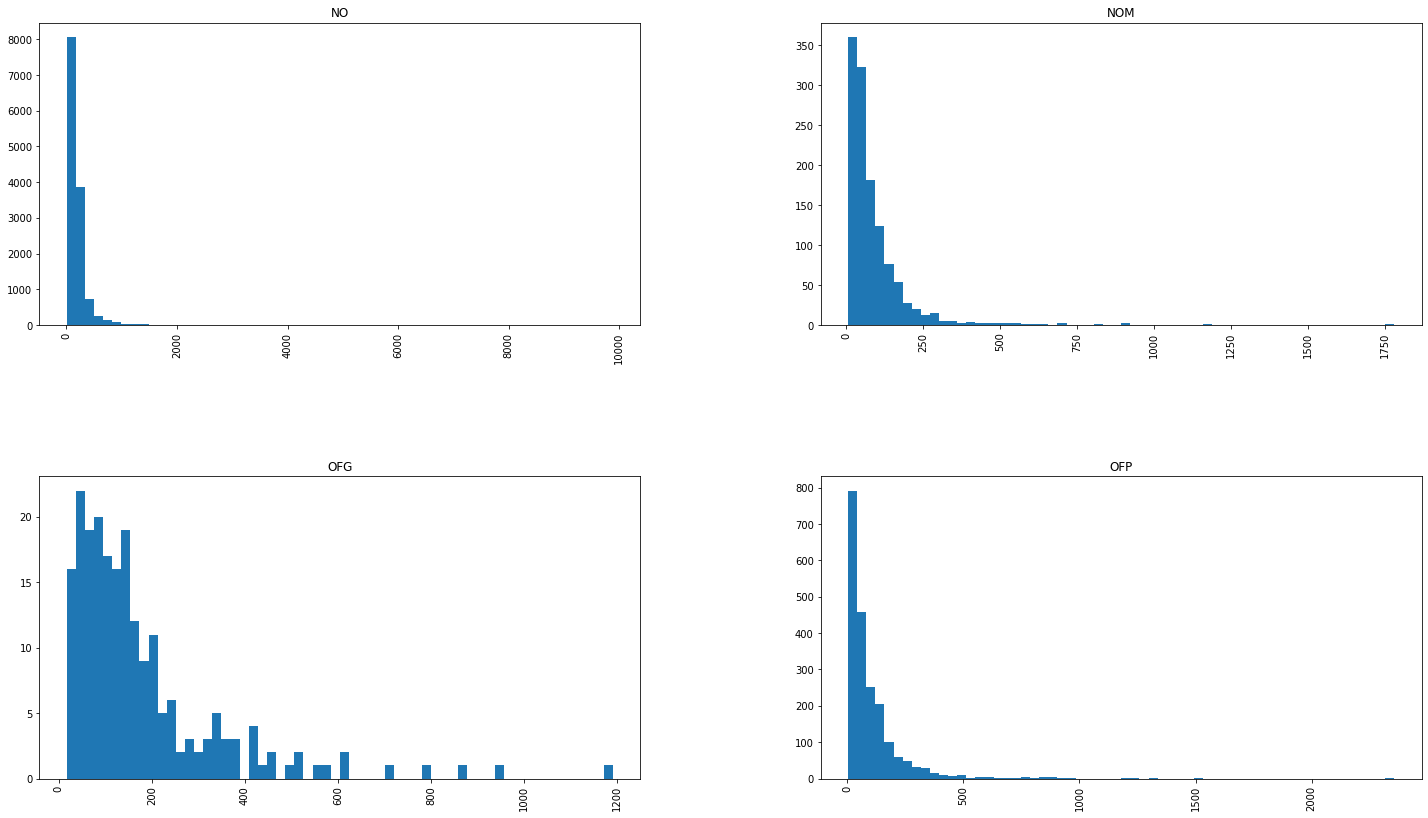

In [19]:
train1.hist(column='length', by='label', bins=60, figsize=(24,14))

In [20]:
import string

In [21]:
from nltk.corpus import stopwords

In [22]:
def text_process(mess):
    """
    1.remove punc
    2.remove stop words
    3.return list of clean text words
    """
    nopunc = [char for char in mess if char not in string.punctuation]
    nopunc = ''.join(nopunc)
    
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('spanish')]

In [23]:
train1.head()

,comment_id,comment,label,length
0,52564,"En vez de la magia de mi melena, la magia de m...",NO,56
1,32984,"A ver, los milenials y la gente normal necesit...",NO,135
2,58447,Me encanta todo el contenido que haces se nota...,NO,165
3,10341,a Laura sige así que vales mucho más que 10 o ...,NO,81
4,53087,"Y si no mes gusta Dalas, que hacen aquí,lárgue...",NO,560


In [24]:
train1.comment.head(5).apply(text_process)

0               [vez, magia, melena, magia, nariz, xD]
1    [ver, milenials, gente, normal, necesitamos, p...
2    [encanta, contenido, haces, nota, curras, vide...
3    [Laura, sige, así, vales, 10, 20, 30, estúpido...
4    [si, mes, gusta, Dalas, hacen, aquílárguense, ...
Name: comment, dtype: object

In [25]:
from sklearn.feature_extraction.text import CountVectorizer

In [26]:
bow_transformer =  CountVectorizer(analyzer=text_process).fit(train1['comment'])


In [27]:
stopwords.words('spanish')

['de',
 'la',
 'que',
 'el',
 'en',
 'y',
 'a',
 'los',
 'del',
 'se',
 'las',
 'por',
 'un',
 'para',
 'con',
 'no',
 'una',
 'su',
 'al',
 'lo',
 'como',
 'más',
 'pero',
 'sus',
 'le',
 'ya',
 'o',
 'este',
 'sí',
 'porque',
 'esta',
 'entre',
 'cuando',
 'muy',
 'sin',
 'sobre',
 'también',
 'me',
 'hasta',
 'hay',
 'donde',
 'quien',
 'desde',
 'todo',
 'nos',
 'durante',
 'todos',
 'uno',
 'les',
 'ni',
 'contra',
 'otros',
 'ese',
 'eso',
 'ante',
 'ellos',
 'e',
 'esto',
 'mí',
 'antes',
 'algunos',
 'qué',
 'unos',
 'yo',
 'otro',
 'otras',
 'otra',
 'él',
 'tanto',
 'esa',
 'estos',
 'mucho',
 'quienes',
 'nada',
 'muchos',
 'cual',
 'poco',
 'ella',
 'estar',
 'estas',
 'algunas',
 'algo',
 'nosotros',
 'mi',
 'mis',
 'tú',
 'te',
 'ti',
 'tu',
 'tus',
 'ellas',
 'nosotras',
 'vosotros',
 'vosotras',
 'os',
 'mío',
 'mía',
 'míos',
 'mías',
 'tuyo',
 'tuya',
 'tuyos',
 'tuyas',
 'suyo',
 'suya',
 'suyos',
 'suyas',
 'nuestro',
 'nuestra',
 'nuestros',
 'nuestras',
 'vuestro'

In [28]:
print(len(bow_transformer.vocabulary_))

46465


In [29]:
mess4=train1['comment'][3]
print(mess4)

a Laura sige así que vales mucho más que 10 o 20 o 30 estúpidos que te critiquen😍


In [30]:
bow4 = bow_transformer.transform([mess4])
print(bow4)

  (0, 50)	1
  (0, 359)	1
  (0, 593)	1
  (0, 6409)	1
  (0, 13933)	1
  (0, 18872)	1
  (0, 23674)	1
  (0, 39770)	1
  (0, 42761)	1


In [31]:
bow_transformer.get_feature_names()[42761]

'vales'

In [32]:
messages_bow =  bow_transformer.transform(train1['comment'])

In [33]:
print('Shape of Sparse Matrix:', messages_bow.shape)
print('Amount of Non-Zero occurences: ', messages_bow.nnz)

Shape of Sparse Matrix: (16710, 46465)
Amount of Non-Zero occurences:  250321


In [34]:
messages_bow.nnz

250321

In [35]:
sparsity = (100.0 * messages_bow.nnz / (messages_bow.shape[0] * messages_bow.shape[1]))
print('sparsity: {}'.format(sparsity))

sparsity: 0.03223998965006704


In [36]:
from sklearn.feature_extraction.text import TfidfTransformer


In [37]:
tfidf_transformer = TfidfTransformer().fit(messages_bow)


In [38]:
tfidf4 = tfidf_transformer.transform(bow4)


In [39]:
print(tfidf4)


  (0, 42761)	0.3726566916324037
  (0, 39770)	0.4353605572720666
  (0, 23674)	0.36903625766963294
  (0, 18872)	0.4537002622967969
  (0, 13933)	0.17782577603606436
  (0, 6409)	0.24068219250499173
  (0, 593)	0.29765291650973186
  (0, 359)	0.29037383034955344
  (0, 50)	0.259021897529722


In [40]:
messages_tfidf = tfidf_transformer.transform(messages_bow)


In [41]:
from sklearn.naive_bayes import MultinomialNB


In [42]:
spam_detect_model = MultinomialNB().fit(messages_tfidf, train1['label'])


In [43]:
spam_detect_model.predict(tfidf4)[0]

'NO'

In [44]:
train1['label'][3]

'NO'

In [45]:
all_pred = spam_detect_model.predict(messages_tfidf)

In [46]:
all_pred

array(['NO', 'NO', 'NO', ..., 'NO', 'NO', 'NO'], dtype='<U3')

In [52]:
pred=spam_detect_model.predict_proba(messages_tfidf)
pred

array([[9.65000344e-01, 9.31567270e-03, 1.18657183e-03, 2.44974119e-02],
       [9.85863988e-01, 2.11710815e-03, 2.25219999e-04, 1.17936840e-02],
       [9.93788722e-01, 1.60512180e-03, 5.96984227e-05, 4.54645797e-03],
       ...,
       [9.44242015e-01, 1.36385095e-02, 1.39014316e-03, 4.07293319e-02],
       [8.61986632e-01, 1.71135897e-02, 1.84490051e-03, 1.19054878e-01],
       [5.62000797e-01, 1.00430552e-01, 1.81554204e-02, 3.19413231e-01]])

In [53]:
df_predict=pd.DataFrame(pred) 
df_predict.head()

,0,1,2,3
0,0.965000,0.009316,0.001187,0.024497
1,0.985864,0.002117,0.000225,0.011794
2,0.993789,0.001605,0.000060,0.004546
3,0.975192,0.008071,0.000906,0.015832
4,0.994800,0.001074,0.000056,0.004070


In [59]:
df2 = df_predict.assign(ColumnA = '[' + df_predict[0].astype(str) + ', ' +
  df_predict[1].astype(str) + ', ' +df_predict[2].astype(str) + ', ' +
  df_predict[3].astype(str) + ']' )


In [61]:
df2.ColumnA

0        [0.9650003435381195, 0.009315672702689704, 0.0...
1        [0.9858639878595029, 0.0021171081522594094, 0....
2        [0.9937887218096911, 0.0016051218013638754, 5....
3        [0.9751922987486294, 0.008070684927607989, 0.0...
4        [0.9948002079939395, 0.00107415918439735, 5.60...
                               ...                        
16705    [0.5133878565589657, 0.15442171894358428, 0.00...
16706    [0.9950098756046036, 0.0013275651977808737, 2....
16707    [0.9442420154453852, 0.013638509484236309, 0.0...
16708    [0.8619866319762814, 0.01711358965649212, 0.00...
16709    [0.562000796950955, 0.10043055156848994, 0.018...
Name: ColumnA, Length: 16710, dtype: object

In [62]:
df_final = pd.DataFrame()
df_final['id']=list(train1.comment_id)
df_final['Labels']=list(all_pred)
df_final['Prob']= df2.ColumnA

df_final.head()

,id,Labels,Prob
0,52564,NO,"[0.9650003435381195, 0.009315672702689704, 0.0..."
1,32984,NO,"[0.9858639878595029, 0.0021171081522594094, 0...."
2,58447,NO,"[0.9937887218096911, 0.0016051218013638754, 5...."
3,10341,NO,"[0.9751922987486294, 0.008070684927607989, 0.0..."
4,53087,NO,"[0.9948002079939395, 0.00107415918439735, 5.60..."


In [63]:
# df_final.to_csv('trainOffenES.tsv', sep='\t', header=False, index=False)

In [64]:
test1= pd.read_csv('testdata1.tsv', engine='python', error_bad_lines=False, delimiter='\t')
test1.head()

,comment_id,comment
0,54745,Lacasito moreno
1,5595,Yo pensaba que celopan era gay
2,53477,la bruja del 77
3,7385,Se va a liar bien gorda
4,551,Y Ami que chucha me importa boliviano hijodeputa


In [65]:
test1.size

27212

In [68]:
test1['length']=test1['comment'].apply(len)

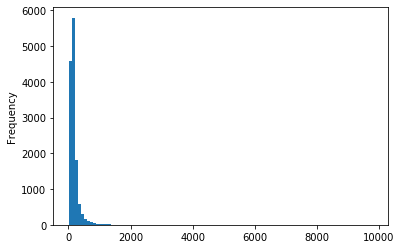

In [69]:
test1['length'].plot.hist(bins=100)

In [72]:
from sklearn.model_selection import train_test_split


In [73]:
msg_train, msg_test, label_train, label_test = train_test_split(train1['comment'], train1['label'], test_size=0.3)

print(len(msg_train), len(msg_test), len(msg_train) + len(msg_test))

11697 5013 16710


In [74]:
from sklearn.pipeline import Pipeline

In [75]:
pipeline = Pipeline([
    ('bow', CountVectorizer(analyzer=text_process)),
    ('tfidf', TfidfTransformer()),
    ('classfier', MultinomialNB())
    
])

In [76]:
pipeline.fit(msg_train, label_train)

Pipeline(memory=None,
         steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x7ffcc5b9d440>,
                                 binary=False, decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('tfidf',
                 TfidfTransformer(norm='l2', smooth_idf=True,
                                  sublinear_tf=False, use_idf=True)),
                ('classfier',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

In [77]:
# pipeline.fit(msg_train, label_train)

In [78]:
predictions = pipeline.predict(msg_test)

In [79]:
from sklearn.metrics import classification_report

In [80]:
print(classification_report(label_test, predictions))

              precision    recall  f1-score   support

          NO       0.80      1.00      0.89      3973
         NOM       1.00      0.01      0.03       367
         OFG       0.00      0.00      0.00        64
         OFP       0.93      0.02      0.04       609

    accuracy                           0.80      5013
   macro avg       0.68      0.26      0.24      5013
weighted avg       0.82      0.80      0.71      5013



/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [81]:
predictions

array(['NO', 'NO', 'NO', ..., 'NO', 'NO', 'NO'], dtype='<U3')

In [82]:
pipeline.predict_proba(msg_test)

array([[9.62972100e-01, 5.32129262e-03, 8.53021034e-04, 3.08535862e-02],
       [9.96476141e-01, 9.66274336e-04, 9.13440526e-05, 2.46624037e-03],
       [9.93310245e-01, 1.41418853e-03, 1.47749031e-04, 5.12781737e-03],
       ...,
       [9.57771134e-01, 1.15403428e-02, 1.09807583e-03, 2.95904471e-02],
       [9.95715509e-01, 4.79321639e-04, 4.88784162e-05, 3.75629113e-03],
       [9.84330030e-01, 6.14341396e-03, 5.08926033e-04, 9.01762999e-03]])

Now we are going to use the pipeline for the test set

In [83]:
predictions_test_set = pipeline.predict(test1.comment)


In [84]:
predictions_test_set


array(['NO', 'NO', 'NO', ..., 'NO', 'NO', 'NO'], dtype='<U3')

In [85]:
df_predict_test=pd.DataFrame(predictions_test_set) 
df_predict_test.head()

,0
0,NO
1,NO
2,NO
3,NO
4,NO


In [86]:
probs_test=pipeline.predict_proba(test1.comment)

In [87]:
df_predict_test=pd.DataFrame(probs_test) 
df_predict_test.head()

,0,1,2,3
0,0.847077,0.055095,0.009836,0.087992
1,0.910204,0.012513,0.001793,0.075491
2,0.859040,0.029263,0.005324,0.106373
3,0.894729,0.011241,0.001091,0.092939
4,0.860370,0.035078,0.004516,0.100036


In [90]:
df3 = df_predict_test.assign(ColumnA = '[' + df_predict_test[0].astype(str) + ', ' +
  df_predict_test[1].astype(str) + ', ' +df_predict_test[2].astype(str) + ', ' +
  df_predict_test[3].astype(str) + ']' )
df3

,0,1,2,3,ColumnA
0,0.847077,0.055095,0.009836,0.087992,"[0.8470767328647746, 0.05509510060748689, 0.00..."
1,0.910204,0.012513,0.001793,0.075491,"[0.9102038791209272, 0.012512734199136127, 0.0..."
2,0.859040,0.029263,0.005324,0.106373,"[0.8590397533924893, 0.029263275320352614, 0.0..."
3,0.894729,0.011241,0.001091,0.092939,"[0.8947287820242714, 0.011240891237539694, 0.0..."
4,0.860370,0.035078,0.004516,0.100036,"[0.8603697486037152, 0.03507752541391342, 0.00..."
...,...,...,...,...,...
13601,0.986115,0.001122,0.000063,0.012700,"[0.986115336760979, 0.001122340306815353, 6.26..."
13602,0.996335,0.000886,0.000061,0.002718,"[0.9963348196520714, 0.0008859551442033076, 6...."
13603,0.927500,0.022195,0.000891,0.049414,"[0.9274996863869837, 0.022194929512611185, 0.0..."
13604,0.994158,0.001225,0.000091,0.004526,"[0.9941576078791506, 0.0012250194043152394, 9...."


In [92]:
df_final = pd.DataFrame()
df_final['id']=list(test1.comment_id)
df_final['Labels']=list(predictions_test_set)
df_final['Prob']= df3.ColumnA

df_final.head()


,id,Labels,Prob
0,54745,NO,"[0.8470767328647746, 0.05509510060748689, 0.00..."
1,5595,NO,"[0.9102038791209272, 0.012512734199136127, 0.0..."
2,53477,NO,"[0.8590397533924893, 0.029263275320352614, 0.0..."
3,7385,NO,"[0.8947287820242714, 0.011240891237539694, 0.0..."
4,551,NO,"[0.8603697486037152, 0.03507752541391342, 0.00..."


In [94]:
df_final.to_csv('NonContextTestOffenES.tsv', sep='\t', header=False, index=False)

In [ ]:
df_final.to_csv('NonContextTestOffenES.tsv', sep='\t', header=False, index=False)


In [ ]:
train2.head()

In [ ]:
# from textblob import TextBlob, Word, Blobber

# from google_trans_new import google_translator

# translator = google_translator()


In [ ]:
# traducir = lambda x: translator.translate(x,lang_tgt='en')
# train1['en'] = train1[:1000]['comment'].apply(traducir)

In [ ]:
# X,y = devdata2[features].values, devdata2['label'].values
# labels=devdata2['label'].unique()
# labels

In [ ]:
# from sklearn.preprocessing import LabelEncoder

# label_encoder = LabelEncoder()
# label_encoder.fit(y)
# y = label_encoder.transform(y)
# y

In [ ]:
# label_encoder.inverse_transform(y)


In [ ]:
 label_encoder.classes_

In [ ]:
comments_id = devdata2['comment_id']

X=devdata2.drop(columns=['comment_id', 'comment', 'label'])

dummy = pd.get_dummies(X)

X= pd.concat([comments_id, dummy], axis=1)
X.head()

In [ ]:
from sklearn.model_selection import train_test_split

# Split data 70%-30% into training set and test set
X_train_v1, X_test_v1, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0, stratify=y )

# print ('Train set:', X_train.shape,  y_train.shape)
# print ('Test set:', X_test.shape,  y_test.shape)

 stratify=y stratification means that the train_test_split method returns training and test subsets that have the same proportions of class labels as the input dataset.



In [ ]:
comment_id_train=X_train_v1.comment_id
comment_id_test=X_test_v1.comment_id
X_train = X_train_v1.drop(columns=['comment_id'])
X_test = X_test_v1.drop(columns=['comment_id'])

print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

Tree = DecisionTreeClassifier(criterion="entropy", max_depth = 3, class_weight='balanced')
Tree # it shows the default parameters


In [ ]:
Tree.fit(X_train,y_train)

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import precision_score, recall_score, mean_absolute_error, mean_squared_error, f1_score

# Get predictions from test data
predictions_tree_v2 = Tree.predict(X_test)
y_scores_tree_v2 = Tree.predict_proba(X_test)

# Get evaluation metrics

print('Accuracy:', accuracy_score(y_test, predictions_tree_v2))
print("Overall Precision:",precision_score(y_test, predictions_tree_v2, average='macro'))
print("Overall Recall:",recall_score(y_test, predictions_tree_v2,  average='macro'))
print("Overall f1:",f1_score(y_test, predictions_tree_v2,  average='macro'))


In [ ]:
from sklearn. metrics import classification_report

print(classification_report(y_test, predictions_tree_v2))

In [ ]:
from sklearn.externals.six import StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree

dot_data = StringIO()
filename = "Tree.png"
featureNames = X_train.columns.to_list()
targetNames = labels
out=tree.export_graphviz(Tree,feature_names=featureNames, out_file=dot_data, class_names= label_encoder.classes_, filled=True,  special_characters=False,rotate=False)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png(filename)
img = mpimg.imread(filename)
plt.figure(figsize=(100, 200))
plt.imshow(img,interpolation='nearest')

In [ ]:
# Get class probability scores
prob_tree_v2 = Tree.predict_proba(X_test)

# Get ROC metrics for each class
fpr = {}
tpr = {}
thresh ={}
for i in range(len(labels)):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, prob_tree_v2[:,i], pos_label=i)
    
# Plot the ROC chart
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label=labels[0] + ' vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label=labels[1] + ' vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label=labels[2] + ' vs Rest')
plt.plot(fpr[3], tpr[3], linestyle='--',color='red', label=labels[3] + ' vs Rest')

plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.show()

In [ ]:
prob_tree_v2


In [ ]:
max_idx = prob_tree_v2.argmax(axis=1) #get the indexes for the max probabilities
out_labels = [label_encoder.classes_[i] for i in max_idx]
print(out_labels)

In [ ]:
len(out_labels)

In [ ]:
df_final = pd.DataFrame()
df_final['id']=list(comment_id_test)
df_final['Labels']=out_labels
df_final['Prob']= list(prob_tree_v2)

df_final.head()

In [ ]:
df_final.to_csv('DevEs.tsv', sep='\t', header=False, index=False)